In [1]:
# Importing the require libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
# Reading the dataset

dataset = pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
# Getting the input  data

x = dataset.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [4]:
# Creating the OPTICS clustering model

from sklearn.cluster import OPTICS, cluster_optics_dbscan
clust_optics = OPTICS(min_samples=50, xi=0.05, min_cluster_size=0.05)
cluster = clust_optics.fit(x)

C:\Users\reema\anaconda3\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\reema\anaconda3\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\reema\anaconda3\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Users\reema\anaconda3\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Users\reema\anaconda3\envs\aiml\lib\sit

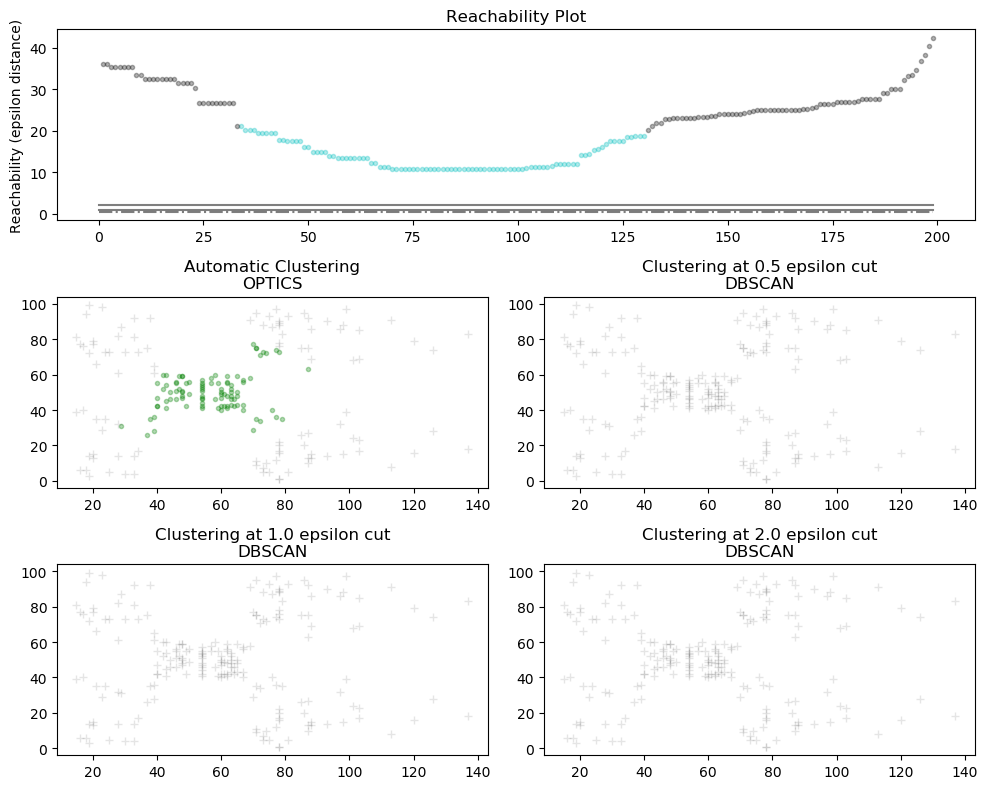

In [12]:
# Creating clusters with different Epsilon Values

labels_050 = cluster_optics_dbscan(
    reachability = cluster.reachability_,
    core_distances = cluster.core_distances_,
    ordering = cluster.ordering_,
    eps = 0.5)

labels_100 = cluster_optics_dbscan(
    reachability = cluster.reachability_,
    core_distances = cluster.core_distances_,
    ordering = cluster.ordering_,
    eps = 1)

labels_200 = cluster_optics_dbscan(
    reachability = cluster.reachability_,
    core_distances = cluster.core_distances_,
    ordering = cluster.ordering_,
    eps = 2)

space = np.arange(len(x))
reachability = cluster.reachability_[cluster.ordering_]
labels = cluster.labels_[cluster.ordering_]

plt.figure(figsize = (10,8))
G = gridspec.GridSpec(3, 2)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[2, 0])
ax5 = plt.subplot(G[2, 1])

# Reachability Plot

colors = ["g.", "r.", "b.", "y.", "c."]
for k, col in zip(range(0, 5), colors):
    Xk = space[labels == k]
    Rk = reachability[labels == k]
    ax1.plot(Xk, Rk, color, alpha=0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], "k.", alpha=0.3)
ax1.plot(space, np.full_like(space, 2.0, dtype=float), "k-", alpha=0.5)
ax1.plot(space, np.full_like(space, 1.0, dtype=float), "k-", alpha=0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype=float), "k-.", alpha=0.5)
ax1.set_ylabel("Reachability (epsilon distance)")
ax1.set_title("Reachability Plot")

# OPTICS

colors = ["g.", "r.", "b.", "y.", "c."]
for k, color in zip(range(0, 5), colors):
    Xk = x[cluster.labels_ == k]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax2.plot(x[cluster.labels_ == -1, 0], x[cluster.labels_ == -1, 1], "k+", alpha=0.1)
ax2.set_title("Automatic Clustering\nOPTICS")

# DBSCAN at 0.5
colors = ["g.", "r.", "b.", "c."]
for k, color in zip(range(0, 4), colors):
    Xk = x[labels_050 == k]
    ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax3.plot(x[labels_050 == -1, 0], x[labels_050 == -1, 1], "k+", alpha=0.1)
ax3.set_title("Clustering at 0.5 epsilon cut\nDBSCAN")

# DBSCAN at 1.0
colors = ["g.", "r.", "b.", "c."]
for k, color in zip(range(0, 4), colors):
    Xk = x[labels_100 == k]
    ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax4.plot(x[labels_050 == -1, 0], x[labels_100 == -1, 1], "k+", alpha=0.1)
ax4.set_title("Clustering at 1.0 epsilon cut\nDBSCAN")

# DBSCAN at 2.
colors = ["g.", "m.", "y.", "c."]
for k, color in zip(range(0, 4), colors):
    Xk = x[labels_200 == k]
    ax5.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax5.plot(x[labels_200 == -1, 0], x[labels_200 == -1, 1], "k+", alpha=0.1)
ax5.set_title("Clustering at 2.0 epsilon cut\nDBSCAN")

plt.tight_layout()
plt.show()
    






In [6]:
space = np.arange(len(x))
space


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [7]:
reachability = cluster.reachability_[cluster.ordering_]
reachability

array([        inf, 36.22154055, 36.22154055, 35.34119409, 35.34119409,
       35.34119409, 35.34119409, 35.34119409, 35.34119409, 33.54101966,
       33.54101966, 32.44996148, 32.44996148, 32.44996148, 32.44996148,
       32.44996148, 32.44996148, 32.44996148, 32.44996148, 31.57530681,
       31.57530681, 31.57530681, 31.57530681, 30.3644529 , 26.68332813,
       26.68332813, 26.68332813, 26.68332813, 26.68332813, 26.68332813,
       26.68332813, 26.68332813, 26.68332813, 21.21320344, 21.21320344,
       20.09975124, 20.09975124, 20.09975124, 19.41648784, 19.41648784,
       19.41648784, 19.41648784, 19.41648784, 17.88854382, 17.88854382,
       17.4642492 , 17.4642492 , 17.4642492 , 17.4642492 , 16.1245155 ,
       16.1245155 , 15.        , 15.        , 15.        , 15.        ,
       13.92838828, 13.92838828, 13.45362405, 13.45362405, 13.45362405,
       13.41640786, 13.41640786, 13.41640786, 13.41640786, 13.41640786,
       12.20655562, 12.20655562, 11.3137085 , 11.3137085 , 11.31

In [8]:
labels = cluster.labels_[cluster.ordering_]
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])